# Machine Learning Engineer Nanodegree

### Project: Recharge Yourself


In a prepaid dominant territory, customer has to recharge/top up the balance for his mobile connection every month at least once. We want to predict the next recharge amount for a customer under the Capstone project. 

Target is to identify the next recharge amount of a particular subscriber. It’s a regression problem.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from sklearn import metrics
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('recharge.csv')
    
# Success
print "recharge dataset has {} data points with {} variables each.".format(*data.shape)
display(data.head(n=5))

/home/tanveer/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


recharge dataset has 31159 data points with 26 variables each.


SEQ  JAN_TOTAL_V_CALLS  FEB_TOTAL_V_CALLS  MAR_TOTAL_V_CALLS  \
0  1121                251                395                420   
1  1741                 44                  0                163   
2  2251                 15                  0                  0   
3  4134                 15                 28                  6   
4  5087                106                 60                 98   

   APR_TOTAL_V_CALLS  JAN_TOTAL_VOFF_CALLS  FEB_TOTAL_VOFF_CALLS  \
0                525                   251                   383   
1                 67                    16                     0   
2                  0                    10                     0   
3                  3                    12                    25   
4                139                    83                    44   

   MAR_TOTAL_VOFF_CALLS  APR_TOTAL_VOFF_CALLS  JAN_TOTAL_V_REV     ...       \
0                   416                   523             0.00     ...        
1                    41                     7            89.77     ...        
2                     0                     0            31.22     ...        
3                     6                     3            29.81     ...        
4                    71                    95           207.30     ...        

   APR_DATA_REV  JAN_OTHERS  FEB_OTHERS  MAR_OTHERS  APR_OTHERS  JAN_RCG  \
0        461.62         0.0         0.0        0.49        20.0      261   
1          0.00         0.5         0.0       12.50         0.5        0   
2          0.00        62.0        34.0        0.00         0.0        0   
3          0.60         0.0         0.5        0.00         0.0       49   
4          5.75         5.0         2.5        0.00        27.0      262   

   FEB_RCG  MAR_RCG  APR_RCG  NETWORK_AGE  
0      534      556      642          376  
1        0        0        0          260  
2        0        0        0          915  
3      105       78       20         1954  
4      214     1214      656         2524  

[5 rows x 26 columns]

In [79]:
# Drop unnecessary features and save target feature.
# Target value (APR_RCG) is stored in a new variable called recharge.
# SEQ and other April months features like APR_TOTAL_V_CALLS','APR_TOTAL_VOFF_CALLS','APR_TOTAL_V_REV'
##,'APR_DATA_REV','APR_OTHERS' are dropped since these variables will not be used in the model.

recharge = data['APR_RCG']
features_raw = data.drop(['SEQ','APR_RCG','APR_TOTAL_V_CALLS','APR_TOTAL_VOFF_CALLS','APR_TOTAL_V_REV','APR_DATA_REV','APR_OTHERS'], axis = 1)
print "features_raw dataset has {} data points with {} variables each.".format(*features_raw.shape)

features_raw dataset has 31159 data points with 19 variables each.


## Data Exploration


### Implementation: Calculate Statistics

- Calculate the count,mean,standard deviation, minimum, maximum and quartile value  of of all features.


In [3]:
#Statistical Data Visualization

display(features_raw.describe())

JAN_TOTAL_V_CALLS  FEB_TOTAL_V_CALLS  MAR_TOTAL_V_CALLS  \
count       31159.000000       31159.000000       31159.000000   
mean          140.560480         131.294361         146.223980   
std           210.198292         197.370328         213.304769   
min             0.000000           0.000000           0.000000   
25%            11.000000           9.000000          11.000000   
50%            68.000000          64.000000          72.000000   
75%           188.000000         177.000000         198.000000   
max          5524.000000        5586.000000        4306.000000   

       JAN_TOTAL_VOFF_CALLS  FEB_TOTAL_VOFF_CALLS  MAR_TOTAL_VOFF_CALLS  \
count          31159.000000          31159.000000          31159.000000   
mean             106.401489             99.786964            111.693154   
std              176.337755            167.680944            179.793988   
min                0.000000              0.000000              0.000000   
25%                6.000000              5.000000              6.000000   
50%               44.000000             42.000000             47.000000   
75%              136.000000            130.000000            144.000000   
max             5261.000000           5586.000000           4306.000000   

       JAN_TOTAL_V_REV  FEB_TOTAL_V_REV  MAR_TOTAL_V_REV  JAN_DATA_REV  \
count     31159.000000      31159.00000     31159.000000  31159.000000   
mean        137.381919        127.65225       139.429081     84.835392   
std         245.807590        236.39285       244.037083    196.131976   
min           0.000000          0.00000         0.000000      0.000000   
25%           7.215000          4.41000         6.685000      0.000000   
50%          55.910000         51.45000        57.130000      0.060000   
75%         166.735000        157.29000       173.985000     73.100000   
max        8676.630000       9388.94000      5785.680000   5261.680000   

       FEB_DATA_REV  MAR_DATA_REV    JAN_OTHERS    FEB_OTHERS    MAR_OTHERS  \
count  31159.000000  31159.000000  31159.000000  31159.000000  31159.000000   
mean      80.363597     90.562392     11.312810     10.674158     11.856223   
std      181.991243    196.620857     33.967704     33.214146     35.194292   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.040000      0.820000      0.000000      0.000000      0.000000   
75%       71.300000     82.315000      7.500000      7.000000      8.000000   
max     4394.190000   3583.720000   2556.000000   2722.500000   2286.000000   

            JAN_RCG       FEB_RCG       MAR_RCG   NETWORK_AGE  
count  31159.000000  31159.000000  31159.000000  31159.000000  
mean     271.211143    257.955486    295.529414   1982.941847  
std      490.972967    446.760369    486.330084   1589.084670  
min        0.000000      0.000000      0.000000    100.000000  
25%        0.000000      0.000000      0.000000    535.000000  
50%       61.000000     84.000000    116.000000   1542.000000  
75%      371.000000    358.000000    413.000000   3446.000000  
max    13000.000000  11700.000000   9000.000000   7397.000000

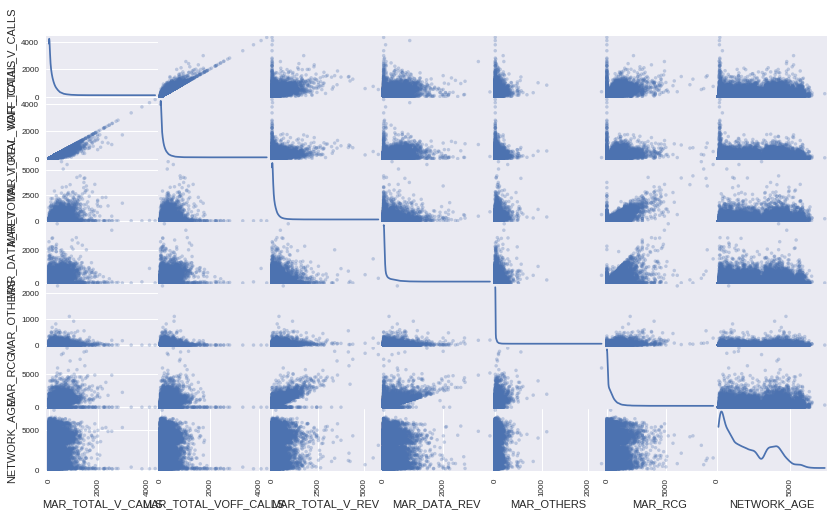

In [80]:
#Scatterplot visualization


import seaborn as sns
from pandas.plotting import scatter_matrix

features_limited = features_raw[['MAR_TOTAL_V_CALLS','MAR_TOTAL_VOFF_CALLS','MAR_TOTAL_V_REV', 'MAR_DATA_REV','MAR_OTHERS','MAR_RCG','NETWORK_AGE']]

pd.scatter_matrix(features_limited, alpha = 0.3, figsize = (14,8), diagonal = 'kde');



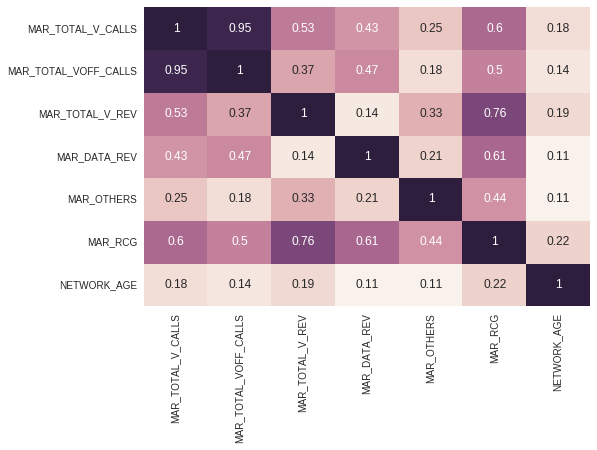

In [5]:
sns.heatmap(features_limited.corr(), annot=True,cbar = False)

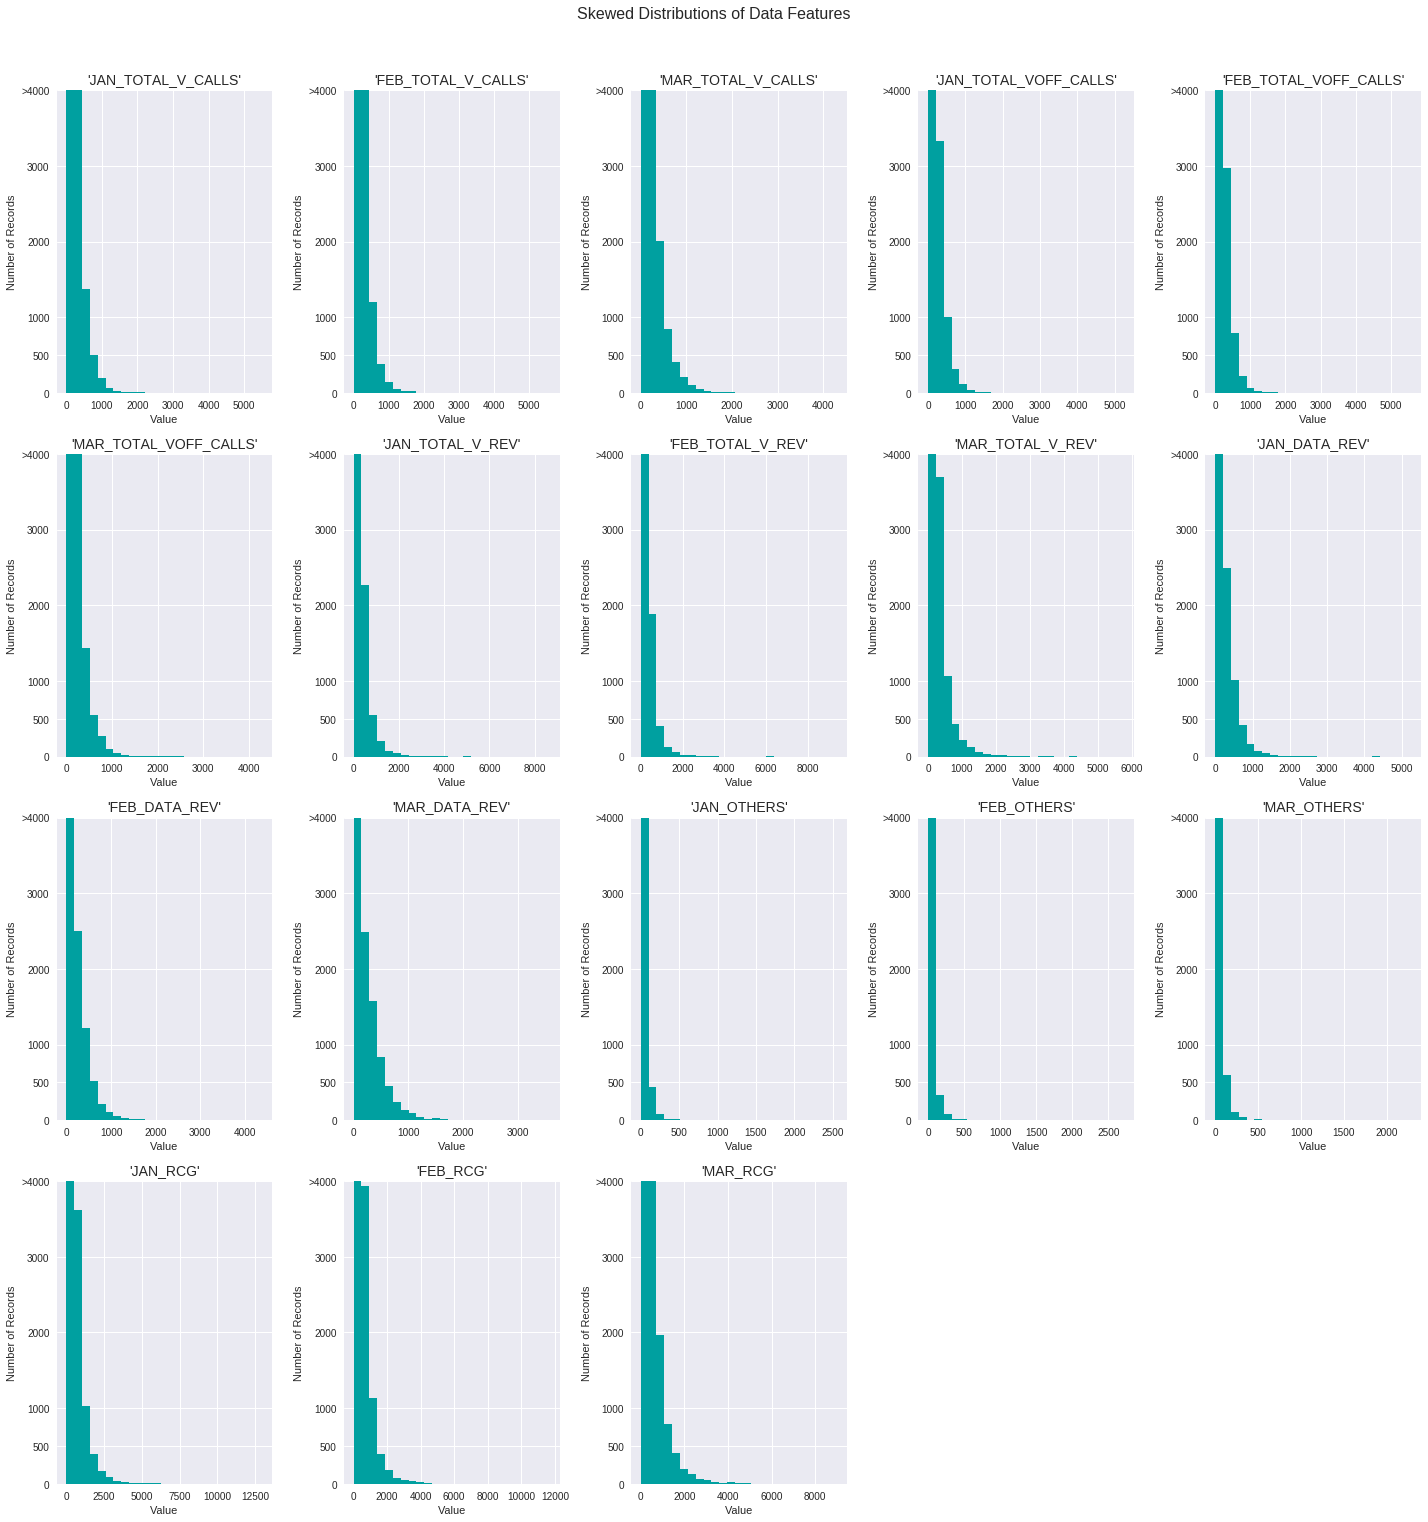

In [6]:
numerical = features_raw.columns
try:
       vs.distribution (features_raw, numerical)
except IndexError:
    pass
       

In [7]:
# Make a log transformation of all numerical features as all of them are positively skewed
features_raw[numerical] = features_raw[numerical].apply(lambda x: np.log(x + 1))

print ('After Log Transformation:')
display(features_raw.head(1))

After Log Transformation:


JAN_TOTAL_V_CALLS  FEB_TOTAL_V_CALLS  MAR_TOTAL_V_CALLS  \
0           5.529429           5.981414           6.042633   

   JAN_TOTAL_VOFF_CALLS  FEB_TOTAL_VOFF_CALLS  MAR_TOTAL_VOFF_CALLS  \
0              5.529429              5.950643              6.033086   

   JAN_TOTAL_V_REV  FEB_TOTAL_V_REV  MAR_TOTAL_V_REV  JAN_DATA_REV  \
0              0.0         4.294015          3.81925      5.372357   

   FEB_DATA_REV  MAR_DATA_REV  JAN_OTHERS  FEB_OTHERS  MAR_OTHERS   JAN_RCG  \
0         5.832      5.934894         0.0         0.0    0.398776  5.568345   

    FEB_RCG   MAR_RCG  NETWORK_AGE  
0  6.282267  6.322565     5.932245

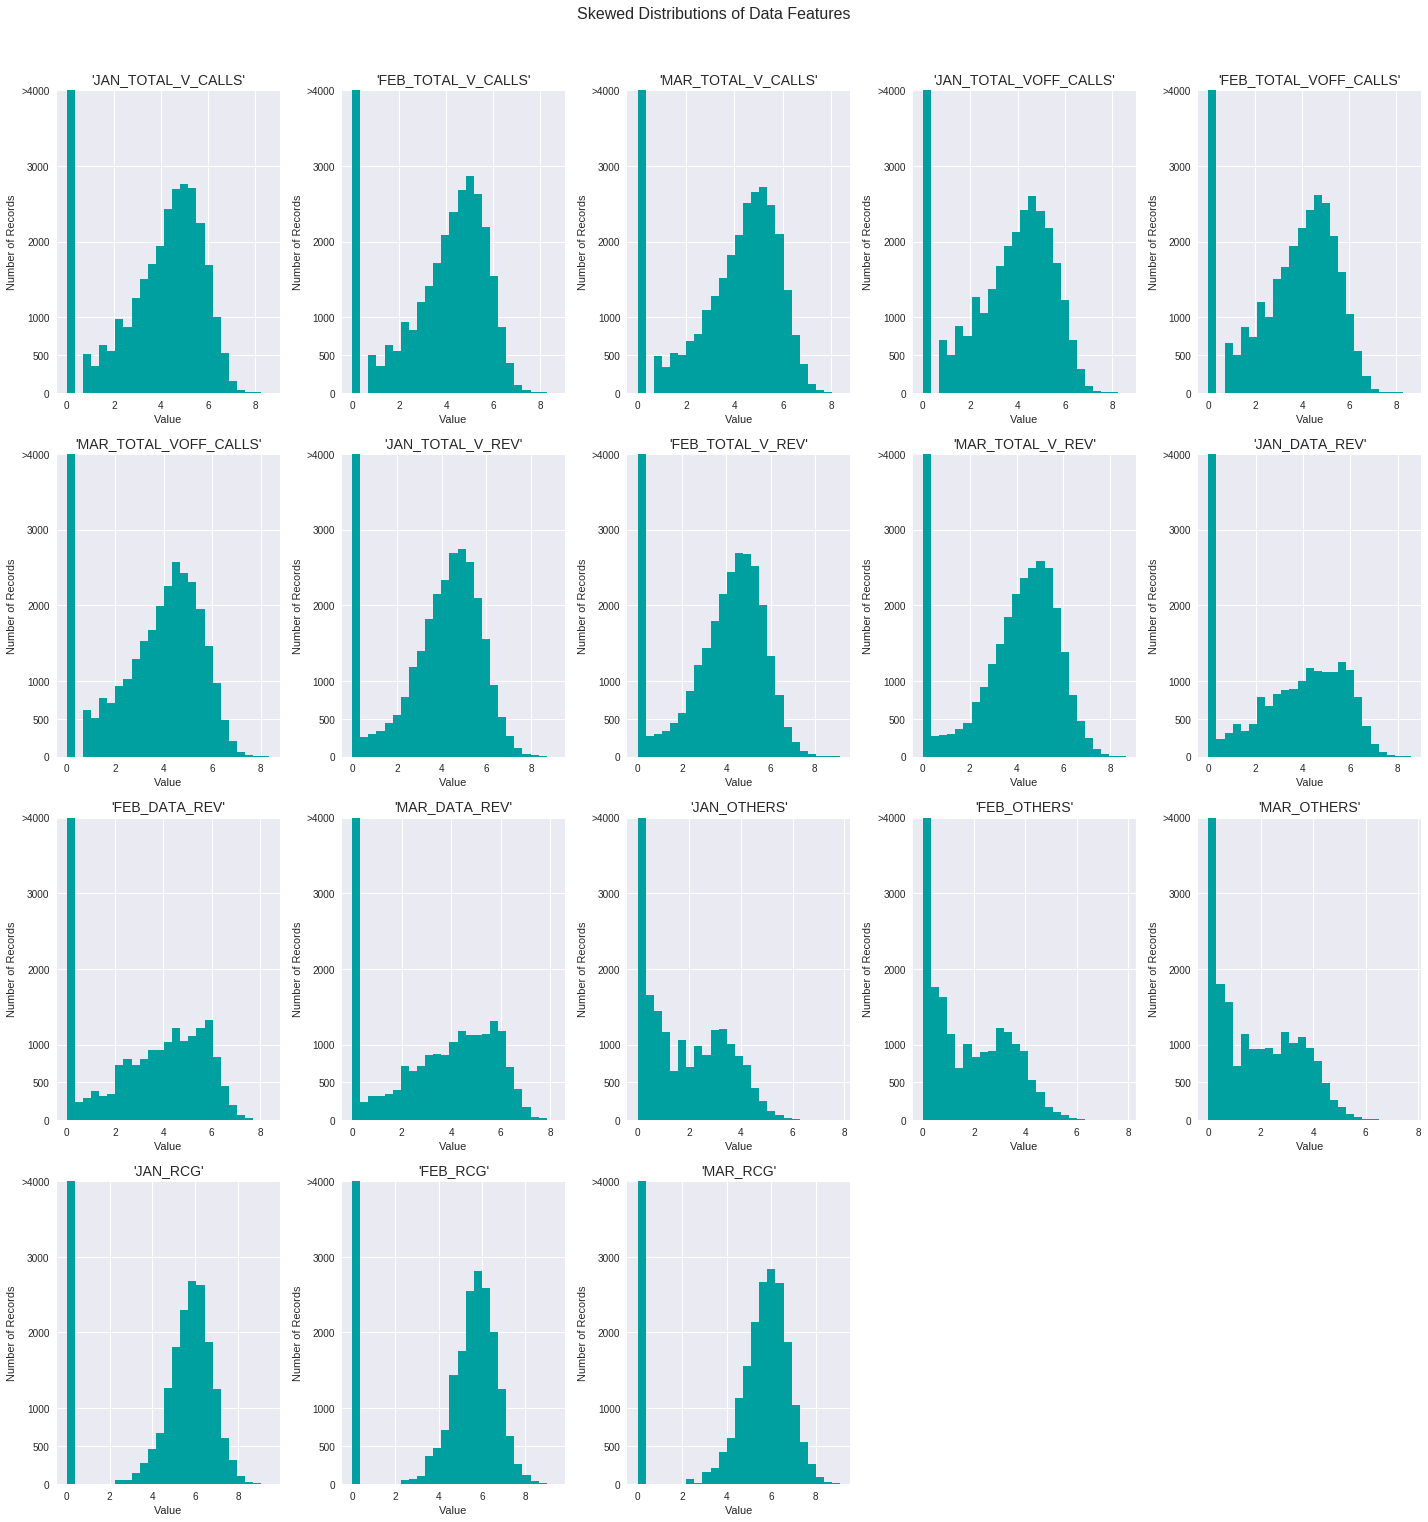

In [8]:
# Visualization after Log transformation
try:
    vs.distribution (features_raw,numerical)
except IndexError:
    pass

** 
  After visualizing the Numerical data it is clearly shows that data is Skewed Positively. We need to Log transform the numerical values to have normal distribution. After Log transform, data is evenly distributed.    
**

----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. 

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._



In [9]:
# TODO: Import 'r2_score'


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = metrics.r2_score (y_true, y_predict)    
    # Return the score
    return score

#**Normalizing Numerical Features**

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution ; however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

We will use sklearn.preprocessing.MinMaxScaler for this.


In [10]:
#Numerical Data scaling

from sklearn.preprocessing import MinMaxScaler


# Apply scaling from 0 ~ 1 for all numerical features
scaler = MinMaxScaler()
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])
print ('After Scaling of numerical features:')
display(features_raw.head(1))

features = features_raw


After Scaling of numerical features:


JAN_TOTAL_V_CALLS  FEB_TOTAL_V_CALLS  MAR_TOTAL_V_CALLS  \
0           0.641686            0.69324           0.722112   

   JAN_TOTAL_VOFF_CALLS  FEB_TOTAL_VOFF_CALLS  MAR_TOTAL_VOFF_CALLS  \
0              0.645338              0.689674              0.720971   

   JAN_TOTAL_V_REV  FEB_TOTAL_V_REV  MAR_TOTAL_V_REV  JAN_DATA_REV  \
0              0.0         0.469425         0.440853      0.626997   

   FEB_DATA_REV  MAR_DATA_REV  JAN_OTHERS  FEB_OTHERS  MAR_OTHERS   JAN_RCG  \
0      0.695257      0.725144         0.0         0.0    0.051555  0.587826   

   FEB_RCG   MAR_RCG  NETWORK_AGE  
0  0.67065  0.694399     0.306747

### Implementation: Shuffle and Split Data
Split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, we need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `recharge` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [11]:

# TODO: Import 'train_test_split'

from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split ( features, recharge, test_size = 0.20, random_state = 33)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
print ('Sample training feature: ')
display(X_train.head(1))

Training set has 24927 samples.
Testing set has 6232 samples.
Sample training feature: 


JAN_TOTAL_V_CALLS  FEB_TOTAL_V_CALLS  MAR_TOTAL_V_CALLS  \
24254           0.769332           0.741011           0.771415   

       JAN_TOTAL_VOFF_CALLS  FEB_TOTAL_VOFF_CALLS  MAR_TOTAL_VOFF_CALLS  \
24254              0.742426              0.712105              0.744561   

       JAN_TOTAL_V_REV  FEB_TOTAL_V_REV  MAR_TOTAL_V_REV  JAN_DATA_REV  \
24254         0.776105         0.769531         0.795841           0.0   

       FEB_DATA_REV  MAR_DATA_REV  JAN_OTHERS  FEB_OTHERS  MAR_OTHERS  \
24254           0.0           0.0    0.228349    0.051262    0.208072   

        JAN_RCG   FEB_RCG   MAR_RCG  NETWORK_AGE  
24254  0.769316  0.786995  0.807297     0.680705

#**Model Benchmark**

For benchmark, we have used the following-

1. Mar recharge amount is used as the predicted recharge amount of April.
2. 3 months (Jan,Feb,Mar) average recharge amount is used as the predicted recharge amount of April.


In [81]:
# Benchmarking the model



# Here, Mar recharge amount is used as the predicted recharge amount of April.
APR_RCG_PRED = data['MAR_RCG']
print len(APR_RCG_PRED)
r2_score =  performance_metric (recharge, APR_RCG_PRED)


#Here, 3 months (Jan,Feb,Mar) average recharge amount is used as the predicted recharge amount of April.
APR_RCG_PRED_AVG =  (data ['MAR_RCG'] + data ['FEB_RCG'] + data ['JAN_RCG'])/3
r2_score_AVG =  performance_metric (recharge, APR_RCG_PRED_AVG)


print "Benchmark Prediction based on March Recharge : %f."%r2_score
print "Benchmark Prediction based on Average Recharge  : %f."%r2_score_AVG


31159
Benchmark Prediction based on March Recharge : 0.707901.
Benchmark Prediction based on Average Recharge  : 0.734498.


In [17]:
# importing model libraries
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor



# Intial Model selection

It is a regression model problem. So, we have initially decided to run the following three models. However, later on, we have added few more regression models to check the performance.
    
    - Linear regression
    - Random Forrest regressor
    - AdaBoost Regressor
    
    Additional models tested-
    - Lasso regression with RobustScaler
    - Decision Tree Regressor

For performance checking, initially we have used Root Mean Squared Error (RMSE) but final model selection was done based on r2_score (Coefficient of Determination).



In [14]:

#LinearRegression = LinearRegression()

model_LinearRegression = LinearRegression()
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_LinearRegression, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))



[ 384.90443496  374.86114157  355.53674679  318.63045674  371.88387958]
SCORE (mean: 361.163332 , std: 23.267591)


In [15]:

#lasso = Lasso(alpha =0.0005, random_state=33)
#lasso = Lasso()
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state = 33))
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_lasso, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))



[ 384.90437541  374.86110723  355.53677607  318.63022875  371.88402931]
SCORE (mean: 361.163303 , std: 23.267671)


In [18]:
#DecisionTreeRegressor = DecisionTreeRegressor(random_state=33)

model_DecisionTreeRegressor = DecisionTreeRegressor(random_state=33)
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_DecisionTreeRegressor, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))



[ 338.4855659   348.48453139  368.81586576  303.82272514  363.02237298]
SCORE (mean: 344.526212 , std: 22.982719)


In [19]:
model_randomForest = RandomForestRegressor(n_estimators=50, random_state=33)

# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_randomForest, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))


[ 285.72550474  239.77883952  242.89953423  209.39594142  264.22419957]
SCORE (mean: 248.404804 , std: 25.571447)


In [20]:
model_AdaBoost = AdaBoostRegressor(n_estimators=50, random_state=33)

# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_AdaBoost, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))


[ 561.83766545  418.44903853  368.58297769  389.71305917  410.31868591]
SCORE (mean: 429.780285 , std: 68.259499)


In [21]:
model_lasso.fit(X_train, y_train)
model_LinearRegression.fit(X_train,y_train)
model_randomForest.fit(X_train, y_train)
model_AdaBoost.fit(X_train, y_train)
model_DecisionTreeRegressor.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=33,
           splitter='best')

In [38]:
dict_models = {'LinearRegression':model_LinearRegression,'DecisionTreeRegressor':model_DecisionTreeRegressor, 'lasso':model_lasso, 'RandomForest':model_randomForest, 
               'AdaBoost':model_AdaBoost 
               }

for key, value in dict_models.items():
    pred_train = value.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, pred_train))
    print ("%s: %f" % (key, rmse))


RandomForest: 96.624689
lasso: 361.494969
LinearRegression: 361.494969
AdaBoost: 373.227284
DecisionTreeRegressor: 30.754231


In [119]:
# RandomForest (n_estimator =50)
dict_models = {'LinearRegression':model_LinearRegression,'DecisionTreeRegressor':model_DecisionTreeRegressor, 'lasso':model_lasso, 'RandomForest':model_randomForest, 
               'AdaBoost':model_AdaBoost 
               }

for key, value in dict_models.items():
    pred_train = value.predict(X_train)
    r2_score = performance_metric (y_train, pred_train)
    print ("%s: %f" % (key, r2_score))


RandomForest: 0.959454
lasso: 0.432488
LinearRegression: 0.432488
AdaBoost: 0.395053
DecisionTreeRegressor: 0.995892


## **Primary Selection of Model:**

DecisionTreeRegressor and Random Forest Model are chosen for superior r2_score. We are going to test both the models.

DecisionTreeRegressor: 0.995892
RandomForest: 0.959454

#**Generating Learning Curve**

Learning Curve-Graph that compares the performance of a model on training and testing data over a varying number of training instances

    If two curves are "close to each other" and both of them but have a low score. The model suffer from an under fitting problem (High Bias)

    If training curve has a much better score but testing curve has a lower score, i.e., there are large gaps between two curves. Then the model suffer from an over fitting problem (High Variance)
    
  **Ideal Learning Curve**

    - Model that generalizes to new data
    - Testing and training learning curves converge at similar values
    - Smaller the gap, the better our model generalizes 


In [33]:

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import sklearn.learning_curve as curves


def ModelLearning(reg_A,X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = reg_A(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(reg_A, X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(reg_A(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title(' Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()


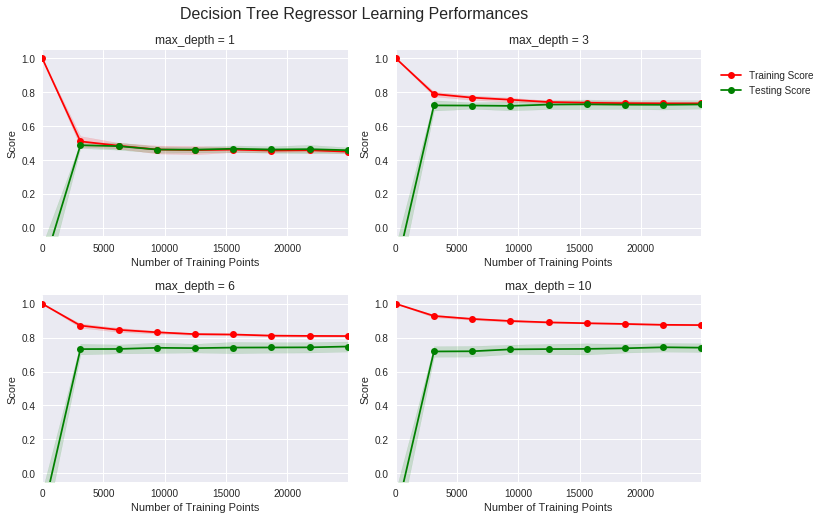

In [34]:
## Produce learning curves for varying training set sizes and maximum depths
#RandomForestRegressor
ModelLearning(RandomForestRegressor,features, recharge)

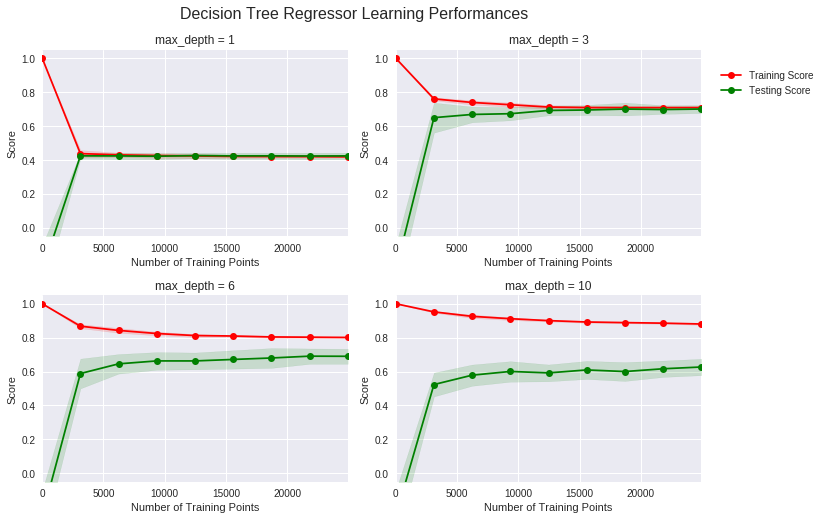

In [35]:
# Produce learning curves for varying training set sizes and maximum depths
#DecisionTreeRegressor
ModelLearning(DecisionTreeRegressor,features, recharge)

**
    For both DecisionTree and RandomForest, Model with Depth = 3 is ideal, where higher score is achieved with lowest variance or bias. However, for RandomForest model, Depth 6, also shows promising output with very low variance or bias.
**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

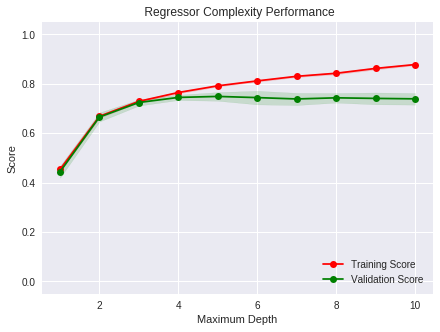

In [36]:
#RandomForestRegressor
ModelComplexity(RandomForestRegressor,X_train, y_train)

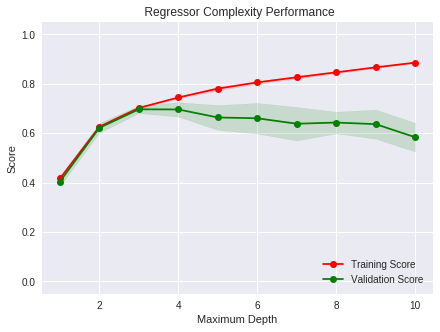

In [37]:
#DecisionTreeRegressor
ModelComplexity(DecisionTreeRegressor,X_train, y_train)

In complexity/validation curve, for RandomForest model, depth -5 seems like more optimum than depth-3 since it has a better score with low variance or bias. 

For DecisionTreeRegressor, depth-3 is the optimum depth with high score and low variance/bias.

# ** Cross validation with GridSearch**

We are going to use Crossvalidated Gridsearch technique to find out the final model after evaluating the model performance using Coefficient of Determination (r2 score).

- Grid search technique- 
It is a process of hyperparameter tuning to find out the optimum result of a Model. Hyperparameter is a parameter of an algorithm. In a grid search, we systematically change the hyperparameter and train the model with a cross validated dataset. After testing each of the models with different hyperparameters, we accumulate the result of all model accuracy, we choose the best model with tuned up hyperparameter.

-  K-fold cross-validation-
It is a technique to create random CV set to test an algorithm. During Grid search, each CV set is tested against each validation point.



In [39]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit (X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth'  : range(1,11) }

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [40]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 3 for the optimal model.


In [41]:
# Model performance on training data
pred_train = reg.predict(X_train)
r2_score = metrics.r2_score (y_train, pred_train)
print ("r2_score of DecisionTree_model on training data: %f." %r2_score)

r2_score of DecisionTree_model on training data: 0.702292.


In [42]:
# Model performance on test data
pred_test = reg.predict(X_test)
r2_score = metrics.r2_score (y_test, pred_test)
print ("r2_score of DecisionTree_model on test data: %f." %r2_score)

r2_score of DecisionTree_model on test data: 0.726231.


In [43]:
# TODO: Import 'make_scorer'and 'GridSearchCV'
# Chosen Model is 'RandomForestRegressor'


from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_RandomForest_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit (X.shape[0], n_iter = 10, test_size = 0.20, random_state = 33)

    # TODO: Create a decision tree regressor object
    regressor = RandomForestRegressor(n_estimators = 50, random_state=33)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth'  : range(1,5)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [46]:
# Fit the training data to the model using grid search
RF_reg = fit_RandomForest_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the sub-optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 3 for the sub-optimal model.


In [47]:
# Model performance on training data
RF_pred_train = RF_reg.predict(X_train)
r2_score = metrics.r2_score (y_train, RF_pred_train)
print ("r2_score of RandomForest_model on training data: %f." %r2_score)

r2_score of RandomForest_model on training data: 0.768636.


In [48]:
# Model performance on test data
RF_pred_test = RF_reg.predict(X_test)
r2_score = metrics.r2_score (y_test, RF_pred_test)
print ("r2_score of RandomForest_model on test data: %f." %r2_score)

r2_score of RandomForest_model on test data: 0.759695.


# Final Model Selection

Based on r2_score, RandomForestRegressor is the chosen model. 

r2_score of RandomForestRegressor- 
            Train data- 77% (0.768636)
            Test data - 76% (0.759695)

r2_score of DecisionTreeRegressor- 
            Train data- 70% (0.702292)
            Test data - 73% (0.726231)
            
Benchmark model-
Benchmark Prediction based on March Recharge : 71% (0.707901).

Benchmark Prediction based on Average Recharge (r2_score_AVG) : 73% (0.734498).

## Model Optimization

In [52]:
# TODO: Import 'make_scorer'and 'GridSearchCV'
# Chosen Model is 'RandomForestRegressor'
#Optimized parameters

from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_RandomForest_model_optimized(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit (X.shape[0], n_iter = 10, test_size = 0.20, random_state = 33)

    # TODO: Create a decision tree regressor object
    regressor = RandomForestRegressor(n_estimators = 120,n_jobs=-1,min_samples_leaf=10,oob_score=True, random_state=33)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth'  : range(1,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [53]:
# Fit the training data to the model using grid search
RF_reg_optimized = fit_RandomForest_model_optimized(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(RF_reg_optimized.get_params()['max_depth'])


Parameter 'max_depth' is 9 for the optimal model.


In [56]:
# Model performance on training data for Optimized RandomForest Model
RF_pred_Optimized_train = RF_reg_optimized.predict(X_train)
r2_score = metrics.r2_score (y_train, RF_pred_Optimized_train)
print ("r2_score of RandomForest_model on training data: %f." %r2_score)

r2_score of RandomForest_model on training data: 0.813492.


In [57]:
# Model performance on test data for Optimized RandomForest Model
RF_pred_Optimized_test = RF_reg_optimized.predict(X_test)
r2_score = metrics.r2_score (y_test, RF_pred_Optimized_test)
print ("r2_score of RandomForest_model on test data: %f." %r2_score)

r2_score of RandomForest_model on test data: 0.774930.


In [58]:
# TODO: Import 'make_scorer'and 'GridSearchCV'
# Chosen Model is 'RandomForestRegressor'
#Optimized parameters

from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_RandomForest_model_superoptimized(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit (X.shape[0], n_iter = 10, test_size = 0.20, random_state = 33)

    # TODO: Create a decision tree regressor object
    regressor = RandomForestRegressor(random_state=33,n_jobs=-1,oob_score=True)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth'  : range(1,10), 'n_estimators' : [70,90,120,150], 'min_samples_leaf' : [1,5,7,10], 'max_features' : ["auto","log2"]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [61]:
# Fit the training data to the model using grid search
RF_reg_superoptimized = fit_RandomForest_model_superoptimized(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(RF_reg_superoptimized.get_params()['max_depth'])

Parameter 'max_depth' is 6 for the optimal model.


In [63]:
# Model performance on training data for Optimized RandomForest Model
RF_pred_superOptimized_train = RF_reg_superoptimized.predict(X_train)
r2_score = metrics.r2_score (y_train, RF_pred_superOptimized_train)
print ("r2_score of RandomForest_model on training data (superoptimized): %f." %r2_score)

r2_score of RandomForest_model on training data (superoptimized): 0.791950.


In [64]:
# Model performance on test data for Optimized RandomForest Model
RF_pred_superOptimized_test = RF_reg_superoptimized.predict(X_test)
r2_score = metrics.r2_score (y_test, RF_pred_superOptimized_test)
print ("r2_score of RandomForest_model on test data (superoptimized): %f." %r2_score)

r2_score of RandomForest_model on test data (superoptimized): 0.772757.


## ** Final Model Performance

RandomForest Model performance-

r2_score of RandomForestRegressor (Basic)- Train data-     76.8% (0.768636)| Test data - 75.9% (0.759695)

r2_score of RandomForestRegressor (Optimized)- Train data- 81.3% (0.813492)| Test data - 77.4% (0.774930)

Benchmark model- Benchmark Prediction based on March Recharge : 70.7% (0.707901).

Benchmark Prediction based on Average Recharge (r2_score_AVG) : 73.4% (0.734498).




#**Extracting Feature Importance and Visualization¶**

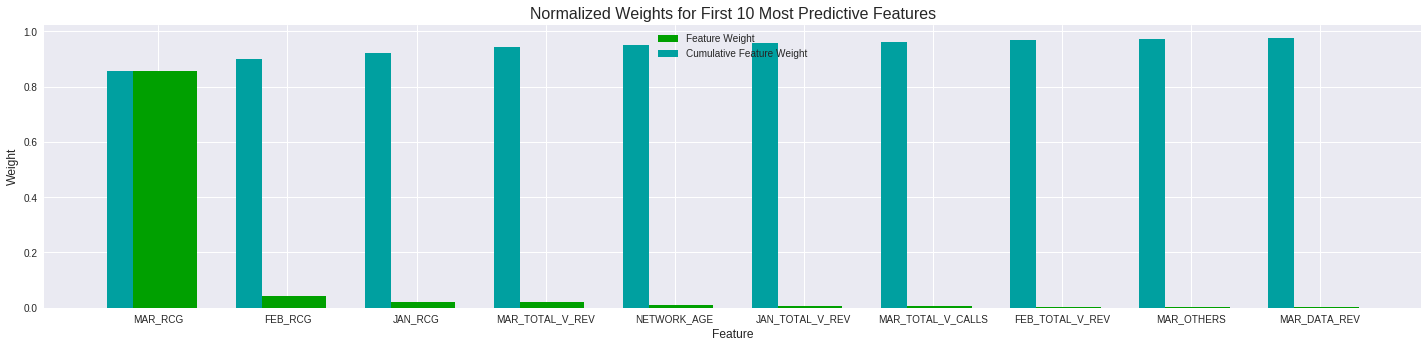

JAN_TOTAL_V_CALLS: 0.00286356325963
FEB_TOTAL_V_CALLS: 0.00282557200717
MAR_TOTAL_V_CALLS: 0.00527545729579
JAN_TOTAL_VOFF_CALLS: 0.00283862750435
FEB_TOTAL_VOFF_CALLS: 0.00262764353904
MAR_TOTAL_VOFF_CALLS: 0.00277529881365
JAN_TOTAL_V_REV: 0.00635835884064
FEB_TOTAL_V_REV: 0.00443556461901
MAR_TOTAL_V_REV: 0.0198065109912
JAN_DATA_REV: 0.00280418056002
FEB_DATA_REV: 0.00234735055638
MAR_DATA_REV: 0.0034042961507
JAN_OTHERS: 0.00315180071656
FEB_OTHERS: 0.00273808466351
MAR_OTHERS: 0.00437351121078
JAN_RCG: 0.0224397584713
FEB_RCG: 0.042640195874
MAR_RCG: 0.857925638215
NETWORK_AGE: 0.00836858671142


In [59]:
# TODO: Extract the feature importances
importances = RF_reg_optimized.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train,10)

for i in range(0,len(numerical)):
    print('{}: {}'.format(numerical[i],importances[i]))

In [60]:
# Import functionality for cloning a model
from sklearn.base import clone

for nFeatures in [5,10,15]:
    # Reduce the feature space
    X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:nFeatures]]]
    X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:nFeatures]]]

    # Train on the "best" model found from grid search earlier
    clf = (clone(RF_reg_optimized)).fit(X_train_reduced, y_train)

    # Make new predictions
    reduced_predictions = clf.predict(X_test_reduced)
    r2_score = metrics.r2_score (y_test, reduced_predictions)
    print ("r2_score of RandomForest_model on test data after reducing feature space: %f." %r2_score)

r2_score of RandomForest_model on test data after reducing feature space: 0.774796.
r2_score of RandomForest_model on test data after reducing feature space: 0.776781.
r2_score of RandomForest_model on test data after reducing feature space: 0.774206.


Observation - Running the model with 10 features has the best result - 77.6% (0.7767). 
It is even better than the original model performance  - 77.4%(0.774930).